In [78]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
data= pd.read_csv("binary.csv")

In [6]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [8]:
data.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [11]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [13]:
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [14]:
#plotting

Text(0, 0.5, 'count')

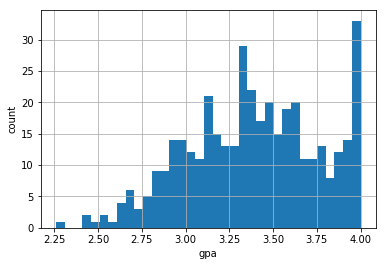

In [28]:
data.gpa.hist(bins= 35, )
plt.xlabel('gpa')
plt.ylabel('count')

Text(0.5, 0, 'gre')

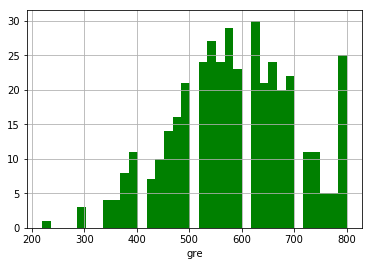

In [32]:
data.gre.hist(bins =35, color ='green')
plt.xlabel('gre')

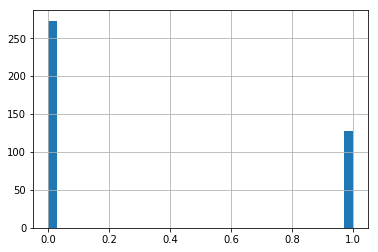

In [33]:
data.admit.hist(bins=35)

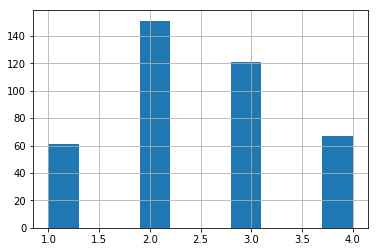

In [39]:
data['rank'].hist()

C:\Users\NIBIN JOSEPH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


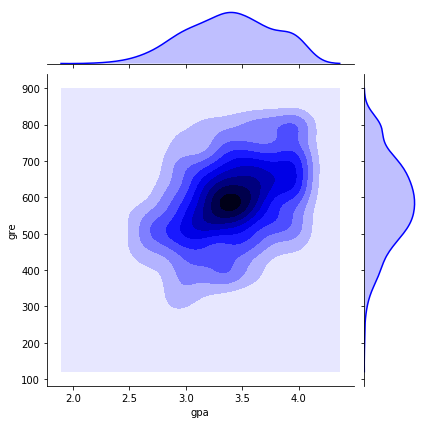

In [41]:
sns.jointplot(x= 'gpa', y= 'gre', data=data, color= 'blue', kind= 'kde')

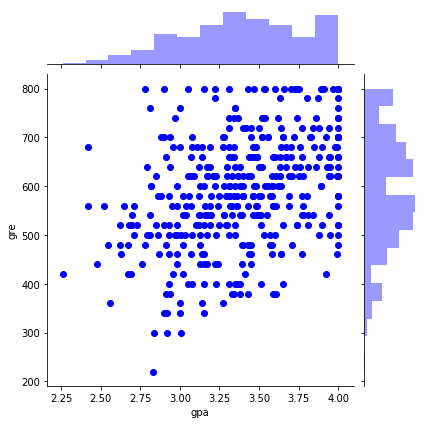

In [42]:
sns.jointplot(x= 'gpa', y= 'gre', data=data, color= 'blue')

In [43]:
 data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [44]:
#NOW WE gona create a dummy variable.for each rank

In [48]:
dummy_ranks= pd.get_dummies(data['rank'], prefix= 'rank' )

In [49]:
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [50]:
dummy_ranks.tail()

,rank_1,rank_2,rank_3,rank_4
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0
399,0,0,1,0


In [51]:
#now we are going to merge bothe the tables


In [61]:
cols_we_need = ['admit', 'gre', 'gpa']

In [62]:
data = data[cols_we_need].join(dummy_ranks.loc[:, 'rank_2' :]) #joining

In [63]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


# lets build our logistic regression model

In [64]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [65]:

from sklearn.model_selection import train_test_split

In [68]:
x = data[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']]

y= data['admit']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state = 4)

In [70]:
print(x_train.shape)

(280, 5)


In [71]:
print(y_train.shape)

(280,)


In [72]:
print(x_test.shape)

(120, 5)


In [73]:
print(y_test.shape)

(120,)


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()

In [76]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
import warnings
warnings.filterwarnings("ignore") #avoid warning


In [81]:
model.fit (x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
prediction = model.predict(x_test)

In [90]:
#classifical report

In [96]:
from sklearn.metrics import classification_report

In [97]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        75
           1       0.62      0.11      0.19        45

   micro avg       0.64      0.64      0.64       120
   macro avg       0.63      0.54      0.48       120
weighted avg       0.64      0.64      0.55       120



# build another logistic regression with less feature

In [98]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [101]:
X= data[['gre', 'gpa']]


y= data[['admit']]

In [102]:
X.shape

(400, 2)

In [103]:
y.shape

(400, 1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 4)

In [105]:
X_train.shape

(280, 2)

In [106]:
X_test.shape

(120, 2)

In [107]:
y_train.shape

(280, 1)

In [108]:
y_test.shape

(120, 1)

In [109]:
model2 = LogisticRegression()

In [110]:
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
model2.fit (x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
prediction2 = model.predict(x_test)

In [113]:
prediction2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [114]:
from sklearn.metrics import classification_report

In [115]:
print (classification_report (y_test, prediction2))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        75
           1       0.62      0.11      0.19        45

   micro avg       0.64      0.64      0.64       120
   macro avg       0.63      0.54      0.48       120
weighted avg       0.64      0.64      0.55       120



In [116]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        75
           1       0.62      0.11      0.19        45

   micro avg       0.64      0.64      0.64       120
   macro avg       0.63      0.54      0.48       120
weighted avg       0.64      0.64      0.55       120

